<a href="https://colab.research.google.com/github/murnilestarirahmi/Studi-Independen-Bersertifikat_Orbit-Future-Academy/blob/main/Machine%20Learning/ML6(2)_Non_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6(2) Non-Hierarchical Clustering: K-Means

# Import Library

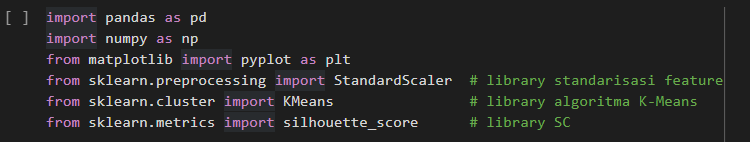

In [ ]:
# Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

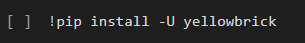

In [ ]:
# Instal library machine learning visualization
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

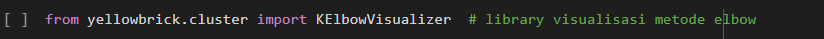

In [ ]:
# Import library visualisasi elbow
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

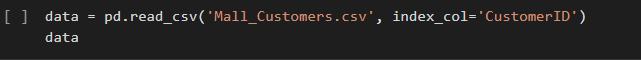

In [ ]:
# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

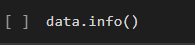

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

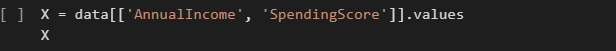

In [ ]:
# memilih variabel
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

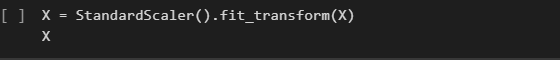

In [ ]:
# standarisasi nilai var
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



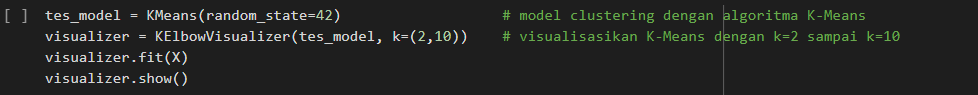

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

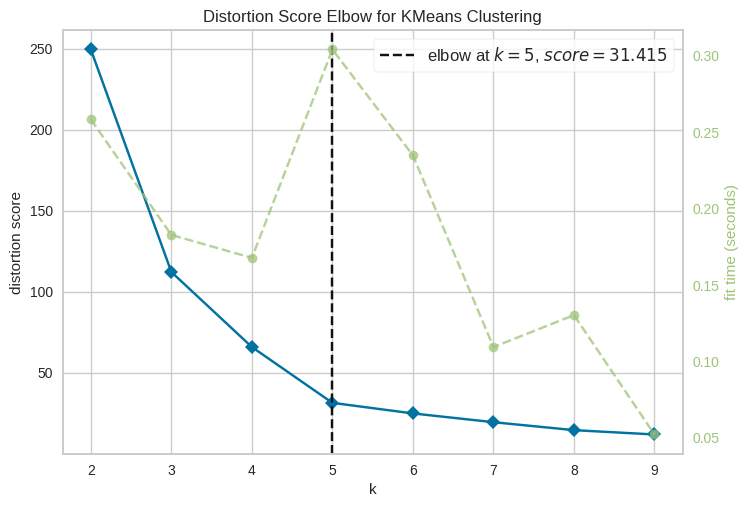

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Mencari nilai K yang paling baik/optimal
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

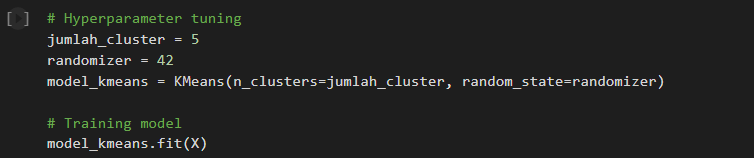

In [ ]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

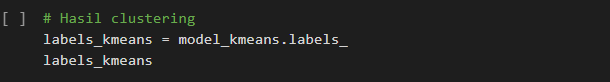

In [ ]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1,
       0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

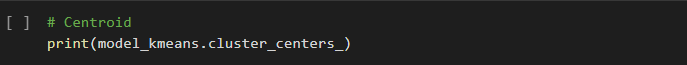

In [ ]:
# Centroid
print(model_kmeans.cluster_centers_)

[[-0.09894748 -1.20506271]
 [-0.11772005  0.91897759]
 [ 7.52694521 -0.11868539]
 [ 0.37342132  4.15876808]
 [-0.17079383 -0.15322869]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

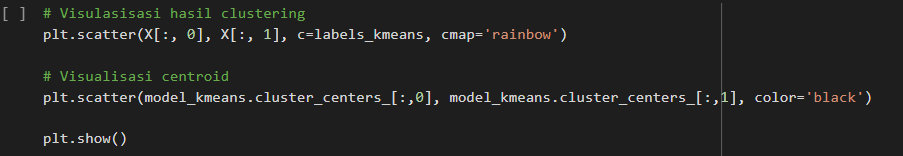

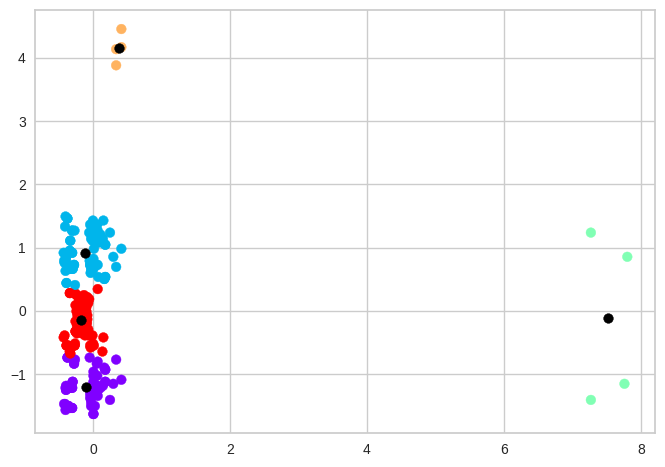

In [ ]:
# Visualisasi hasil Clustering
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

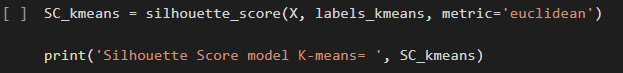

In [ ]:
# Silhouette Coefficient Score
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

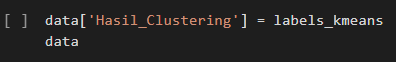

In [ ]:
# Simpan hasil clustering ke dalam dataset
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,1
5,Female,31,17,40,4
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

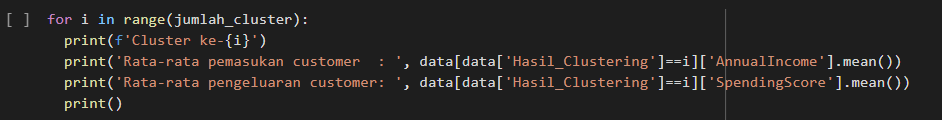

In [ ]:
# Menghitung rata-rata tiap cluster
for i in range(jumlah_cluster):
  print(f'CLuster ke-{i}')
  print('Rata-rata pemasukan customer    : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer  : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

CLuster ke-0
Rata-rata pemasukan customer    :  63.12280701754386
Rata-rata pengeluaran customer  :  14.403508771929825

CLuster ke-1
Rata-rata pemasukan customer    :  60.4054054054054
Rata-rata pengeluaran customer  :  81.06756756756756

CLuster ke-2
Rata-rata pemasukan customer    :  1167.0
Rata-rata pengeluaran customer  :  48.5

CLuster ke-3
Rata-rata pemasukan customer    :  131.5
Rata-rata pengeluaran customer  :  182.75

CLuster ke-4
Rata-rata pemasukan customer    :  52.722772277227726
Rata-rata pengeluaran customer  :  47.415841584158414



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?
- Jawaban: Cluster 0 dan Cluster 2



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

In [ ]:
# Import library
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Menonaktifkan peringatan FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load dataset
data = pd.read_csv('/content/Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [ ]:
# memilih variabel Age, AnnualIncome, dan SpendingScore
X = data[['Age', 'AnnualIncome', 'SpendingScore']].values
X

array([[  19,   15,   39],
       [  21,   15,   81],
       [  20,   16,    6],
       [  23,   16,   77],
       [  31,   17,   40],
       [  22,   17,   76],
       [  35,   18,    6],
       [  23,   18,   94],
       [  64,   19,    3],
       [  30,   19,   72],
       [  67,   19,   14],
       [  35,   19,   99],
       [  58,   20,   15],
       [  24,   20,   77],
       [  37,   20,   13],
       [  22,   20,   79],
       [  35,   21,   35],
       [  20,   21,   66],
       [  52,   23,   29],
       [  35,   23,   98],
       [  35,   24,   35],
       [  25,   24,   73],
       [  46,   25,    5],
       [  31,   25,   73],
       [  54,   28,   14],
       [  29,   28,   82],
       [  45,   28,   32],
       [  35,   28,   61],
       [  40,   29,   31],
       [  23,   29,   87],
       [  60,   30,    4],
       [  21,   30,   73],
       [  53,   33,    4],
       [  18,   33,   92],
       [  49,   33,   14],
       [  21,   33,   81],
       [  42,   34,   17],
 

In [ ]:
# standarisasi nilai var
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
X

array([[-5.63212969e-01, -4.31393298e-01, -4.21372977e-01],
       [-5.19454111e-01, -4.31393298e-01,  9.16824758e-01],
       [-5.41333540e-01, -4.24485019e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.24485019e-01,  7.89377354e-01],
       [-3.00659821e-01, -4.17576739e-01, -3.89511126e-01],
       [-4.97574682e-01, -4.17576739e-01,  7.57515504e-01],
       [-2.13142105e-01, -4.10668459e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.10668459e-01,  1.33102882e+00],
       [ 4.21361338e-01, -4.03760179e-01, -1.56839961e+00],
       [-3.22539250e-01, -4.03760179e-01,  6.30068100e-01],
       [ 4.86999625e-01, -4.03760179e-01, -1.21791925e+00],
       [-2.13142105e-01, -4.03760179e-01,  1.49033807e+00],
       [ 2.90084763e-01, -3.96851899e-01, -1.18605740e+00],
       [-4.53815824e-01, -3.96851899e-01,  7.89377354e-01],
       [-1.69383247e-01, -3.96851899e-01, -1.24978110e+00],
       [-4.97574682e-01, -3.96851899e-01,  8.53101056e-01],
       [-2.13142105e-01, -3.89943619e-01

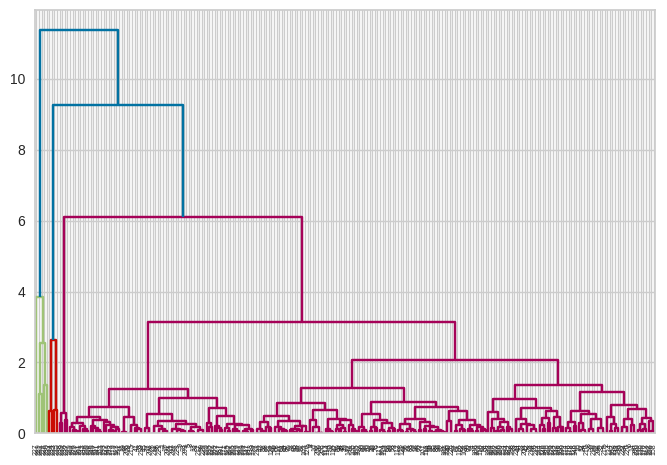

In [ ]:
# Membentuk dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

In [ ]:
# Modelling dengan Agglomerative Hierarchical Clustering (AHC)
jumlah_cluster = 4
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

# Training model
model_AHC.fit(X)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
# Hasil clustering
labels_agglo = model_AHC.labels_
labels_agglo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3])

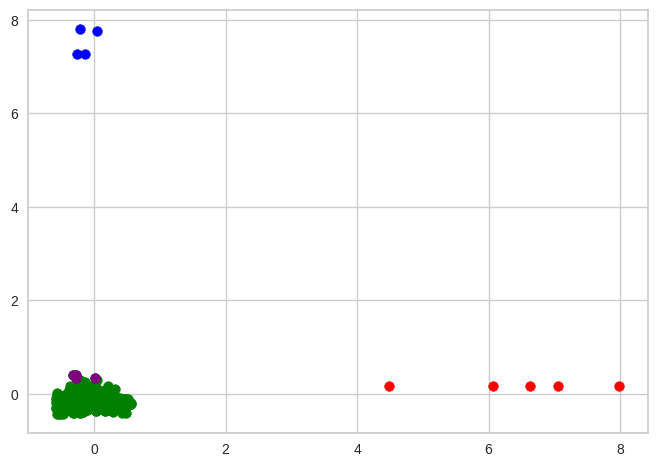

In [ ]:
# Visualisasi hasil clustering
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

In [ ]:
# Hasil clustering
data['Hasil_Clustering'] = labels_agglo
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


In [ ]:
# Mencari rata-rata tiap cluster
for i in range(jumlah_cluster):
  print(f'CLuster ke-{i}')
  print('Rata-rata pemasukan customer    : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer  : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

CLuster ke-0
Rata-rata pemasukan customer    :  102.6
Rata-rata pengeluaran customer  :  52.4

CLuster ke-1
Rata-rata pemasukan customer    :  56.74008810572687
Rata-rata pengeluaran customer  :  49.986784140969164

CLuster ke-2
Rata-rata pemasukan customer    :  1167.0
Rata-rata pengeluaran customer  :  48.5

CLuster ke-3
Rata-rata pemasukan customer    :  131.5
Rata-rata pengeluaran customer  :  182.75



### Model KMeans

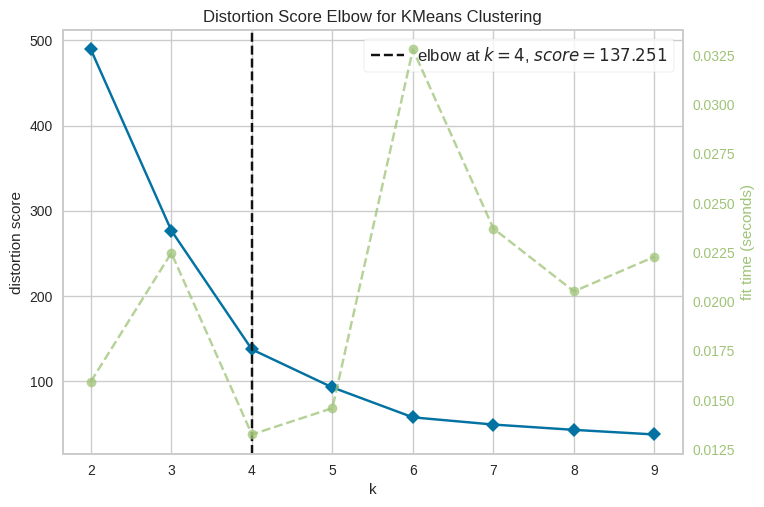

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Mencari nilai K yang paling baik/optimal
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

In [ ]:
# Modelling KMeans
# Hyperparameter tuning
jumlah_cluster = 4
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
# Centroid
print(model_kmeans.cluster_centers_)

[[-2.49494480e-02 -1.45773265e-01 -5.69056962e-01]
 [ 6.44695610e+00  1.73772025e-01  5.57582390e-03]
 [-1.42033960e-01  7.52694521e+00 -1.18685394e-01]
 [-3.37037667e-01 -1.13279492e-01  1.02008786e+00]]


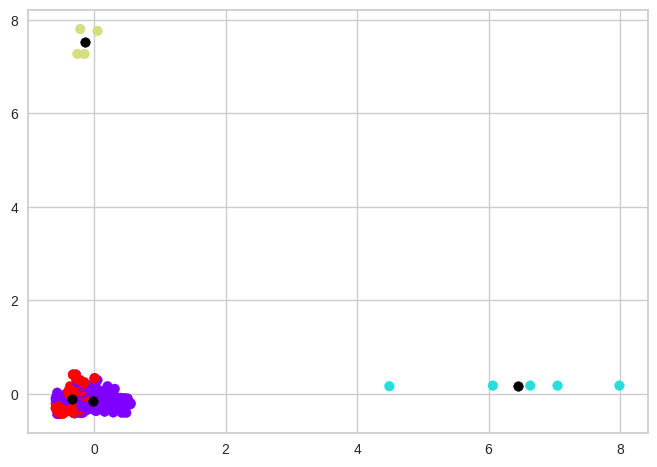

In [ ]:
# Visualisasi hasil Clustering
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

In [ ]:
# Simpan hasil clustering ke dalam dataset
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,3
3,Female,20,16,6,0
4,Female,23,16,77,3
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


In [ ]:
# Menghitung rata-rata tiap cluster
for i in range(jumlah_cluster):
  print(f'CLuster ke-{i}')
  print('Rata-rata pemasukan customer    : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer  : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

CLuster ke-0
Rata-rata pemasukan customer    :  56.3445945945946
Rata-rata pengeluaran customer  :  34.36486486486486

CLuster ke-1
Rata-rata pemasukan customer    :  102.6
Rata-rata pengeluaran customer  :  52.4

CLuster ke-2
Rata-rata pemasukan customer    :  1167.0
Rata-rata pengeluaran customer  :  48.5

CLuster ke-3
Rata-rata pemasukan customer    :  61.04819277108434
Rata-rata pengeluaran customer  :  84.24096385542168



### SC model K-Means dengan AHC

In [ ]:
# Silhouette Coefficient Score AHC
SC_agglo = silhouette_score(X, labels_agglo, metric='euclidean')

print('Silhouette Score model AHC= ', SC_agglo)

Silhouette Score model AHC=  0.7273979303807964


In [ ]:
# Silhouette Coefficient Score KMeans
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.4978301226707703


### Kesimpulan
Berdasarkan Silhouette Score, model terbaik adalah model AHC karena scorenya yang paling mendekati 1 yaitu 0.727

## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC